In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import ast
import itertools
import re
import nltk
from nltk.probability import FreqDist

In [103]:
movies = pd.read_csv("data/movies.csv", index_col='id')

movies[['id_genre', 'id_actor', 'id_directores']] = movies[[
    'id_genre', 'id_actor', 'id_directores']].apply(lambda x: x.apply(eval))

genres = pd.read_csv("data/genres.csv", index_col='genre').to_dict(
    orient='dict')['id']
actors = pd.read_csv("data/actors.csv", index_col='actor').to_dict(
    orient='dict')['id']
directors = pd.read_csv("data/directors.csv", index_col='director').to_dict(
    orient='dict')['id']

(array([4.5341e+04, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0. ,  1239638.3,  2479276.6,  3718914.9,  4958553.2,
         6198191.5,  7437829.8,  8677468.1,  9917106.4, 11156744.7,
        12396383. ]),
 <BarContainer object of 10 artists>)

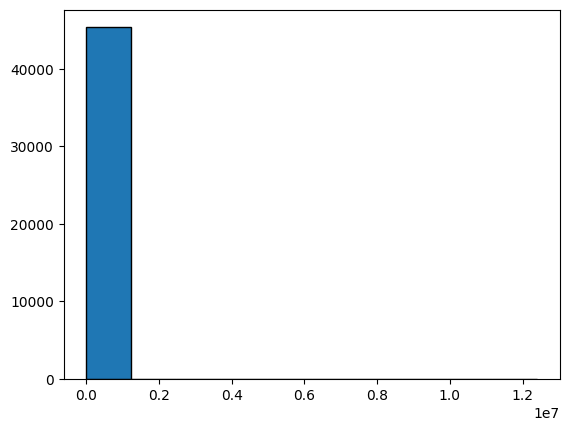

In [104]:
#Graficamos la columna "return". Podemos apreciar que una gran cantidad de datos tienden a cero.
plt.hist(movies["return"], edgecolor = "black", linewidth = 1, bins=10)

In [105]:
# Calculamos los porcentajes en los que se repite cada dato en la columna 'return'
# Más del 88% de los datos de la columna son cero. 

porcentajes = movies['return'].value_counts(normalize=True) * 100

print(porcentajes)

0.000000    88.146433
1.000000     0.044106
2.000000     0.026464
4.000000     0.024258
5.000000     0.017643
              ...    
4.777778     0.002205
2.850634     0.002205
2.382756     0.002205
2.485226     0.002205
0.282600     0.002205
Name: return, Length: 5232, dtype: float64


(array([4.4903e+04, 2.9900e+02, 8.7000e+01, 4.0000e+01, 9.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.78796509e+08, 5.57593017e+08, 8.36389526e+08,
        1.11518603e+09, 1.39398254e+09, 1.67277905e+09, 1.95157556e+09,
        2.23037207e+09, 2.50916858e+09, 2.78796509e+09]),
 <BarContainer object of 10 artists>)

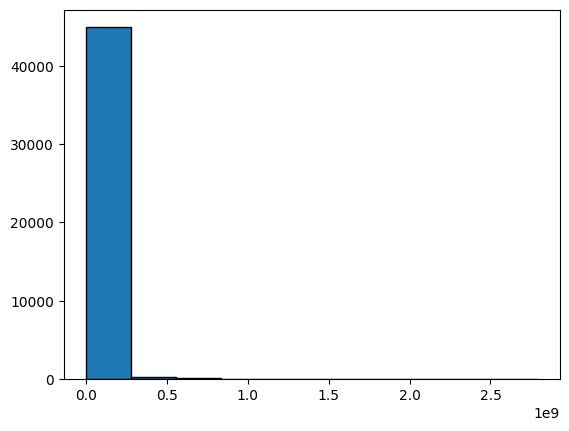

In [106]:
#Graficamos la columna "revenue". Podemos apreciar que una gran cantidad de datos tienden a cero.
plt.hist(movies["revenue"], edgecolor = "black", linewidth = 1, bins=10)

In [107]:
# Calculamos los porcentajes en los que se repite cada dato en la columna 'revenue'
# # Más del 83% de los datos de la columna son cero. 
porcentajes = movies['revenue'].value_counts(normalize=True) * 100

print(porcentajes)

0.0           83.687286
12000000.0     0.044106
11000000.0     0.041901
10000000.0     0.041901
2000000.0      0.039696
                ...    
35610100.0     0.002205
10217873.0     0.002205
100000.0       0.002205
15073942.0     0.002205
1413000.0      0.002205
Name: revenue, Length: 6863, dtype: float64


(array([4.3801e+04, 9.5700e+02, 3.0200e+02, 1.6200e+02, 6.2000e+01,
        3.8000e+01, 1.9000e+01, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <BarContainer object of 10 artists>)

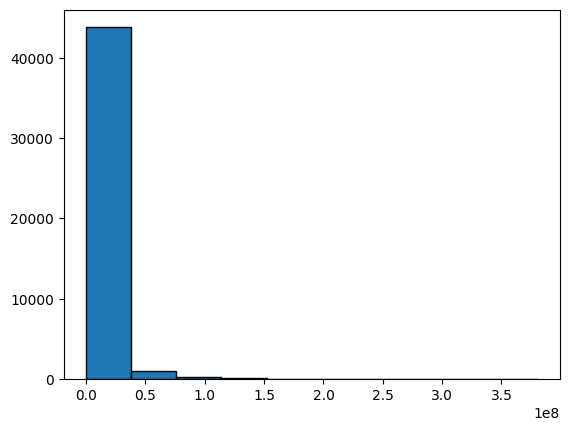

In [108]:
#Graficamos la columna "budget". Podemos apreciar que una gran cantidad de datos tienden a cero.
plt.hist(movies["budget"], edgecolor = "black", linewidth = 1, bins=10)

In [109]:
# Calculamos los porcentajes en los que se repite cada dato en la columna 'budget'
# # Más del 80% de los datos de la columna son cero. 
porcentajes = movies['budget'].value_counts(normalize=True) * 100
print(porcentajes)

0.0            80.425626
5000000.0       0.630720
10000000.0      0.568971
20000000.0      0.535891
2000000.0       0.533686
                 ...    
82500000.0      0.002205
270000000.0     0.002205
923.0           0.002205
72500000.0      0.002205
1254040.0       0.002205
Name: budget, Length: 1223, dtype: float64


Eliminamos columnas

In [110]:
# Procedemos a elimninar las columnas "return", "revenue" y "budget", 
# ya que más del 80% de sus datos son cero.
movies = movies.drop(columns=["return", "revenue", "budget"])

Columna "popularity"

(array([4.5314e+04, 1.5000e+01, 7.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.       ,  54.7488298, 109.4976596, 164.2464894, 218.9953192,
        273.744149 , 328.4929788, 383.2418086, 437.9906384, 492.7394682,
        547.488298 ]),
 <BarContainer object of 10 artists>)

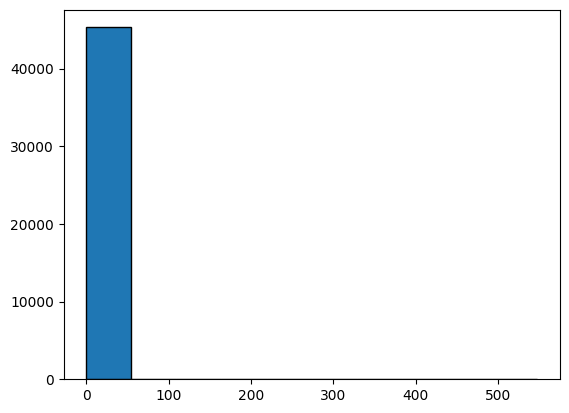

In [111]:
#Graficamos la columna "polularity". 
plt.hist(movies["popularity"], edgecolor = "black", linewidth = 1, bins=10)

In [112]:
popularity = movies["popularity"]  
resumen = popularity.describe()
mediana = popularity.median()
print(f"La mediana es de {mediana}")
print(resumen)

La mediana es de 1.130269
count    45345.000000
mean         2.926248
std          6.011023
min          0.000000
25%          0.388826
50%          1.130269
75%          3.689610
max        547.488298
Name: popularity, dtype: float64


In [113]:
count = sum(movies['popularity'] < 10)

print("Cantidad de valores menores a diez:", count)

Cantidad de valores menores a diez: 42330


In [114]:
count = sum(movies['popularity'] > 10)

print("Cantidad de valores mayores a diez:", count)

Cantidad de valores mayores a diez: 3015


In [115]:
count = sum(movies['popularity'] < 1)


print("Cantidad de valores menores a 1 :", count)

Cantidad de valores menores a 1 : 21151


Una desviación estandar de 6.011023 con un promedio de 2.926248 nos indica una variabilidad significativa de lo datos. Por otro lado, un 25% de los datos no supera el valor de 0.5. La mayoría de valores son menores a 10. El problema es que casi un 50% de los datos son menores a 1. Por lo tanto, no apreciamos un rango cohorente como medida de la popularidad, por lo cual procedemos a eliminar la columna. 

In [116]:
movies = movies.drop(columns=["popularity"])

Columnas de fechas y "runtime"

Las columnas de fechas son irrelevantes para el objetivo del modelo cuyo propósito principal es recomendar películas basándose en la similitud de puntuación entre las mismas. Por lo tanto, las fechas no son indicadores directos de la similitud que buscamos. 

Por otra parte, el campo "runtime" solo serviría para comparar por la duración de cada película. Pero una posible similitud en la duración consideramos que es menos relevante que otras variables como "vote_average" o "vote_count".

Eliminando estas columnas reducimos la dimensionalidad del conjunto de datos y buscamos la eficiencia y rendimiento del modelo. 

In [117]:
#Procedemos a eliminar las columnas mencionadas
movies = movies.drop(columns=["release_date", "release_year", "release_month", "release_day", "runtime"])

Columna vote_average y vote_count

(array([ 2957.,   192.,   528.,  1612.,  4532., 11317., 14625.,  7697.,
         1495.,   390.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

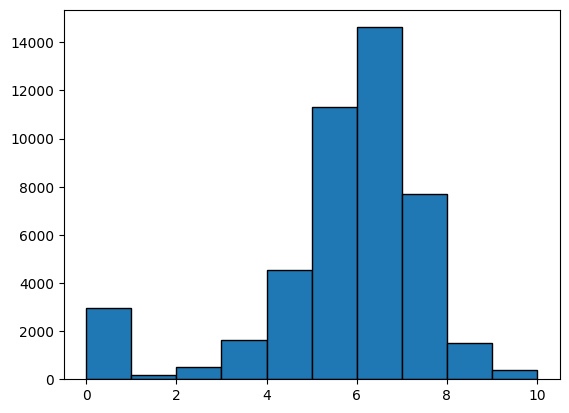

In [118]:
plt.hist(movies["vote_average"], edgecolor = "black", linewidth = 1, bins=10)

In [119]:
porcentajes = movies['vote_average'].value_counts(normalize=True) * 100
print(porcentajes)

0.0    6.490241
6.0    5.427280
5.0    4.397398
7.0    4.150402
6.5    3.797552
         ...   
9.1    0.004411
9.6    0.002205
9.8    0.002205
0.7    0.002205
1.1    0.002205
Name: vote_average, Length: 92, dtype: float64


Podemos apreciar que en el campo vote_average hay más de un 6% de votos iguales a cero. Procedemos a eliminar todos estos valores ya que son irrelevantes como indicadores para la recomendación de una película, pues equivalen a la ausencia de promedio de votación.  

In [120]:
movies = movies[movies['vote_average'] != 0]

(array([4.1603e+04, 4.7700e+02, 1.6200e+02, 8.1000e+01, 4.4000e+01,
        1.7000e+01, 1.0000e+01, 3.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.40840e+03, 2.81580e+03, 4.22320e+03, 5.63060e+03,
        7.03800e+03, 8.44540e+03, 9.85280e+03, 1.12602e+04, 1.26676e+04,
        1.40750e+04]),
 <BarContainer object of 10 artists>)

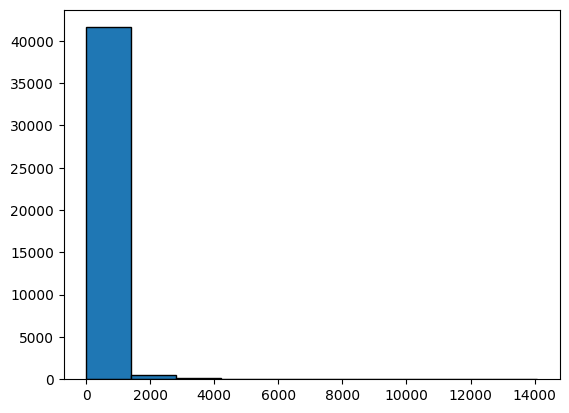

In [121]:
plt.hist(movies["vote_count"], edgecolor = "black", linewidth = 1, bins=10)

In [122]:
porcentajes = movies['vote_count'].value_counts(normalize=True) * 100
print(porcentajes)

1.0       7.452479
2.0       7.360502
3.0       6.551578
4.0       5.834630
5.0       4.940805
            ...   
2755.0    0.002358
1187.0    0.002358
4200.0    0.002358
3322.0    0.002358
2712.0    0.002358
Name: vote_count, Length: 1819, dtype: float64


In [123]:
#Buscamos conteo de valores menores a 1
count = sum(movies['vote_count'] < 1)


print("Cantidad de valores menores a :", count)

Cantidad de valores menores a : 0


Procedemos a eliminar todos estos valores ya que son irrelevantes como indicadores de conteo de votos sobre una película.  

In [124]:
## Campos categóricos

In [125]:
#Graficamos una nube de palabras con los 20 géneros de películas más populares
#Debemos realizar algunas operaciones porque los valores id_genre están en formato lista

import itertools
import re

# Obtener una lista plana con los géneros
lista_planas = list(itertools.chain(*movies['id_genre']))

# Filtrar los elementos que son números enteros
lista_numeros = [str(elemento) for elemento in lista_planas if isinstance(elemento, int) and re.match(r'^\d+$', str(elemento))]

In [126]:
import nltk
from nltk.probability import FreqDist

freq_genero = nltk.FreqDist(lista_planas)

In [127]:
inverted_genres = {genre_id: genre_name for genre_name, genre_id in genres.items()}

nombres_generos = {inverted_genres.get(genre_id, genre_id): freq for genre_id, freq in freq_genero.items()}

print(nombres_generos)

{'animation': 1878, 'comedy': 12595, 'family': 2681, 'adventure': 3371, 'fantasy': 2256, 'romance': 6455, 'drama': 19317, 'action': 6399, 'crime': 4141, 'thriller': 7450, 'horror': 4595, 'history': 1339, 'science fiction': 2967, 'mystery': 2400, 'war': 1268, 'foreign': 1554, 'music': 1477, 'documentary': 3426, 'western': 940, 'tv movie': 705}


(-0.5, 999.5, 999.5, -0.5)

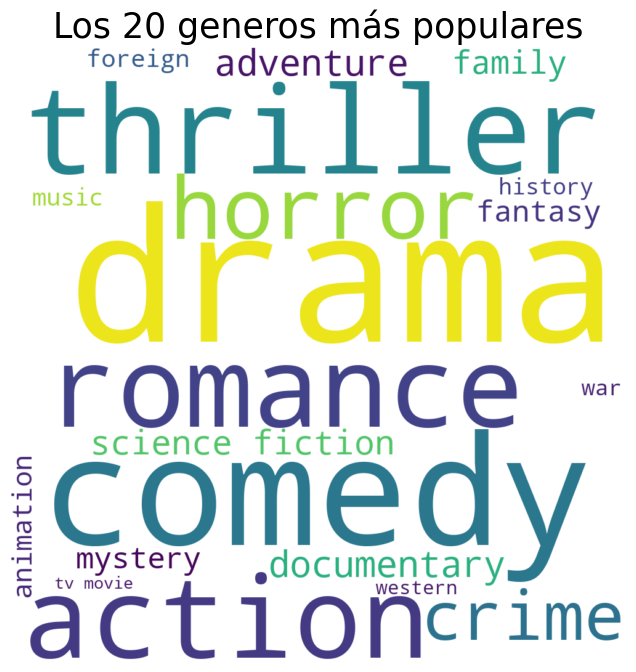

In [128]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=20).generate_from_frequencies(nombres_generos)

plt.figure(figsize=(8,8))
plt.title("Los 20 generos más populares", fontsize=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


## Nube de palabras de los nombres de los 20 directores más populares. 

In [129]:
import itertools
import re

# Obtener una lista plana con los géneros
lista_planas_directores = list(itertools.chain(*movies['id_directores']))

# Filtrar los elementos que son números enteros
lista_numeros = [str(elemento) for elemento in lista_planas if isinstance(elemento, int) and re.match(r'^\d+$', str(elemento))]

In [130]:
import nltk
from nltk.probability import FreqDist

freq_director = nltk.FreqDist(lista_planas_directores)
freq_director

FreqDist({8500: 68, 6818: 55, 4109: 55, 2636: 53, 11523: 51, 3776: 50, 1243: 49, 13848: 44, 39996: 43, 8823: 42, ...})

In [131]:
inverted_directors = {director_id: director_name for director_name, director_id in directors.items()}

nombres_directores = {inverted_directors.get(director_id, director_id): freq for director_id, freq in freq_director.items()}

#Muestra los nombres de los directores y la cantidad de veces que aparecen
print(nombres_directores)

{'john lasseter': 10, 'joe johnston': 10, 'howard deutch': 11, 'forest whitaker': 4, 'charles shyer': 7, 'michael mann': 12, 'sydney pollack': 21, 'peter hewitt': 12, 'peter hyams': 18, 'martin campbell': 12, 'rob reiner': 19, 'mel brooks': 11, 'simon wells': 6, 'oliver stone': 25, 'renny harlin': 19, 'martin scorsese': 40, 'ang lee': 14, 'allison anders': 9, 'alexandre rockwell': 5, 'robert rodriguez': 18, 'quentin tarantino': 11, 'steve oedekerk': 5, 'joseph ruben': 12, 'barry sonnenfeld': 11, 'jon amiel': 9, 'richard donner': 18, 'victor salva': 8, 'mike figgis': 14, 'oliver parker': 10, 'lesli linka glatter': 2, 'roger michell': 11, 'jean-pierre jeunet': 9, 'marc caro': 4, 'zhang yimou': 20, 'john n. smith': 3, 'terry gilliam': 14, 'jean-jacques annaud': 12, 'chris noonan': 2, 'christopher hampton': 3, 'tim robbins': 3, 'stephen low': 3, 'andy tennant': 10, 'amy heckerling': 9, 'darrell james roodt': 7, 'richard loncraine': 11, 'albert hughes': 5, 'allen hughes': 7, 'michael hoffma

(-0.5, 999.5, 999.5, -0.5)

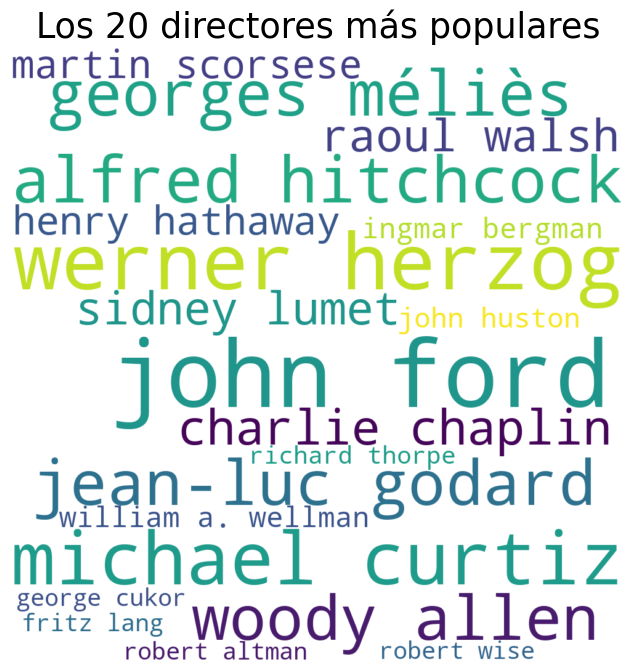

In [132]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=20).generate_from_frequencies(nombres_directores)

plt.figure(figsize=(8,8))
plt.title("Los 20 directores más populares", fontsize=25)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# One hot encoding de los géneros

In [133]:
for k, v in genres.items():
    movies[k] = movies["id_genre"].apply(lambda arr: v in arr).astype(int)

In [134]:
movies.head()

,title,vote_average,vote_count,id_genre,id_actor,id_directores,animation,comedy,family,adventure,...,horror,history,science fiction,mystery,war,foreign,music,documentary,western,tv movie
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,7.7,5415.0,"[16, 35, 10751]","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...",[7879],1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8844,Jumanji,6.9,2413.0,"[12, 14, 10751]","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...",[4945],0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15602,Grumpier Old Men,6.5,92.0,"[10749, 35]","[6837, 3151, 13567, 16757, 589, 16523, 7166]",[26502],0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31357,Waiting to Exhale,6.1,34.0,"[35, 18, 10749]","[8851, 9780, 18284, 51359, 66804, 352, 87118, ...",[2178],0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11862,Father of the Bride Part II,5.7,173.0,[35],"[67773, 3092, 519, 70696, 59222, 18793, 14592,...",[56106],0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
#Eliminación de otras columnas irrelevantes. 
#Los ids se eliminan porque no pueden hacerse operaciones numéricas con ellos.

movies = movies.drop(columns=["id_actor", "id_actor", "id_directores", "id_genre"])

In [136]:
movies.head()

,title,vote_average,vote_count,animation,comedy,family,adventure,fantasy,romance,drama,...,horror,history,science fiction,mystery,war,foreign,music,documentary,western,tv movie
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,7.7,5415.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8844,Jumanji,6.9,2413.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15602,Grumpier Old Men,6.5,92.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31357,Waiting to Exhale,6.1,34.0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11862,Father of the Bride Part II,5.7,173.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
movies.to_csv('movies_modelo.csv', index=True)